# Global Power Plant Database Project	


## Importing Libraries

In [258]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [259]:
# Loading the Dataset
df=pd.read_csv("Global_Power_Plant.csv")

# printing first 5 rows of the DataFrame
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


#### Key attributes of the dataset
- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

In [260]:
# checking the number of rows and columns in the dataset
df.shape

(908, 25)

- In our dataset we have 908 rows and 25 columns including the target variables, "capacity_mw" and "Fuel Type"

In [261]:
# checking the column names in the dataset
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [262]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- Here we see that there are missing values in some of the columns.
- We have 12 columns having object type values and 13 columns having float values.
- There are two columns which have no values and we can delete them

In [263]:
# checking unique value counts for each column
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

- We have 5 columns which has only one unique value, it will not make any difference even if we remove them. 
- name and gppd_idnr has 908 unique values each representing power plant's name and its ID.
- other_fuel3, wepp_id and estimated_generation_gwh has 0 unique values each.

In [264]:
# checking the missing value counts for each column
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

- In our dataset, many columns have missing values, some are categorical and some are numerical. We can fill categorical missing values using Mode and numerical missing values with Mean or Median depending on their distribution.
- Columns like other_fuel3, wepp_id, estimated_generation_gwh, other_fuel2 have all NaN values. There is no reference data to fill in these Null values. We can delete these columns.

<AxesSubplot:>

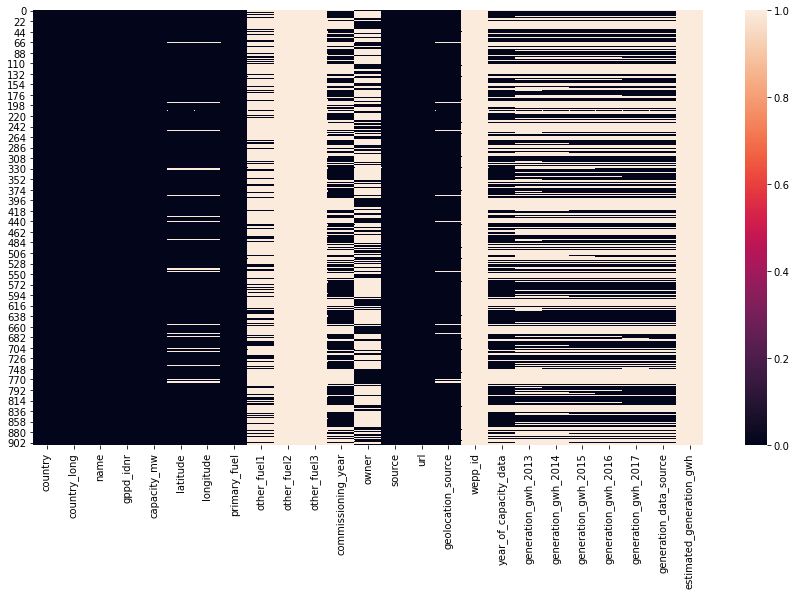

In [265]:
#plotting heatmap to view the missing values
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

- Here we can clearly see the columns having white stripes are the null values.

In [266]:
# Deleting the columns having 0 unique values that means there is no data for those columns.
df=df.drop(["other_fuel3","wepp_id","estimated_generation_gwh"],axis=1)

In [268]:
# checking the value count for country column
df['country'].value_counts()

IND    908
Name: country, dtype: int64

- Country column has only one value "IND".

In [269]:
# checking the value count for country_long column
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

- country_long represents the extended name of the country that is "India".

In [270]:
# checking the value count for primary_fuel column
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

- Majority of the power plant uses Coal and Hydro to generate electricity.

In [271]:
# checking the value count for other_fuel1 column
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

- Oil is used in maximum as other fuel.

In [272]:
# checking the value count for other_fuel2 column
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [273]:
# checking the value count for geolocation_source column
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

- Majority of the power plants are from WRI location.

In [274]:
# checking the value count for year_of_capacity_data column
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [275]:
# checking the value count for generation_data_source column
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [276]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [277]:
# statistocal information
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


#### Statistical Observations:
- Since the count is not same for all the columns, there are missing values.
- We see a difference between Mean and Median for the target variable "capacity_mw", which means the distribution is not normal. Also we see a large difference between 75th percentile and the Max value, so there could be extreme outliers present.
- We also observe difference between Mean and Median for all the "generation_gwh" columns from year 2013 to 2017. This means the distribution is not normal for them. Also extreme outliers could be present.
- For "latitude" and "longitude" the distribution is normal. However, longitude has some outliers present.

## Exploratory Data Analysis

### A] Univariate Analysis

#### Numerical columns' analysis

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

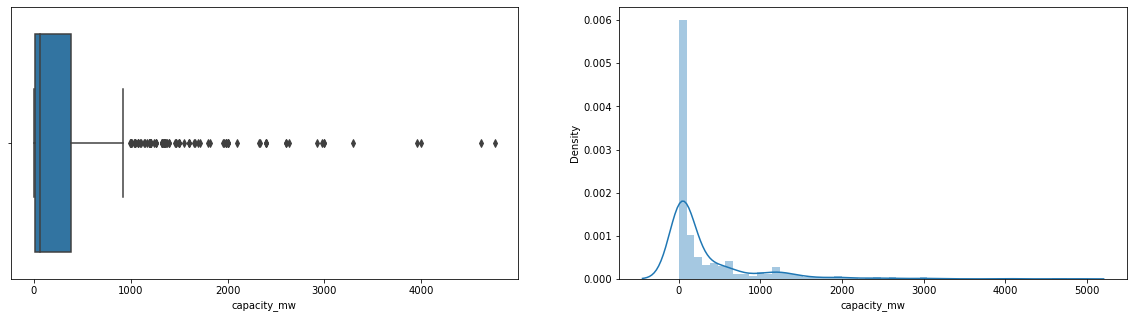

In [278]:
# capacity_mw
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["capacity_mw"])
plt.subplot(1,2,2)
sns.distplot(df["capacity_mw"])

#### Observation:
- capacity_mw values ranges from 0 to 4700.
- The distribution is right-skewed and there are few extreme outliers.

<AxesSubplot:xlabel='latitude', ylabel='Density'>

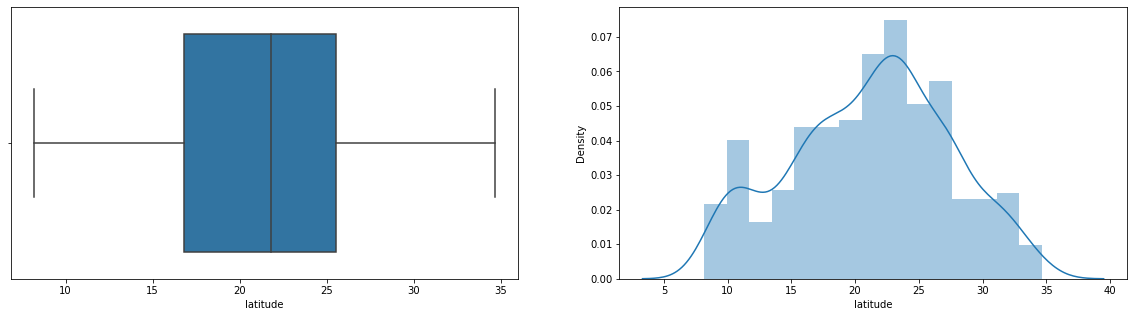

In [279]:
# latitude
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["latitude"])
plt.subplot(1,2,2)
sns.distplot(df["latitude"])

#### Observation:
- Latitude value ranges from around 8 to 35.
- The distribution is almost normal and there are no outliers present.

<AxesSubplot:xlabel='longitude', ylabel='Density'>

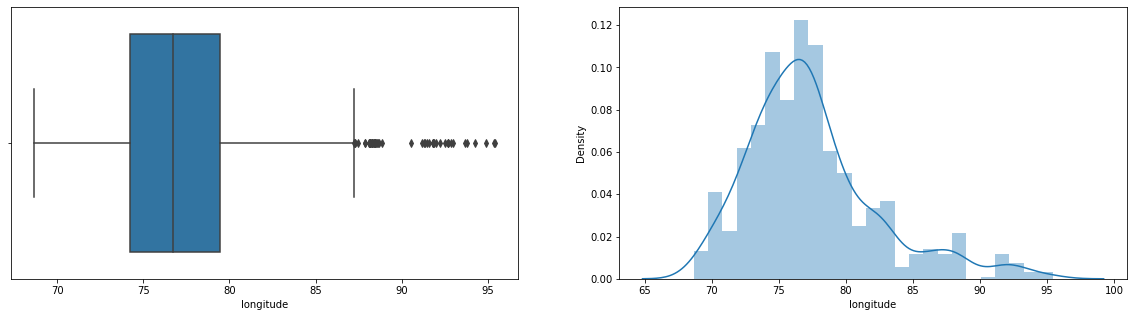

In [280]:
# longitude
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["longitude"])
plt.subplot(1,2,2)
sns.distplot(df["longitude"])

#### Observation:
- The Latitude value ranges from 68 to 95.
- The distribution for longitude attribute is slightly right skewed.
- There are few extreme outliers present.

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

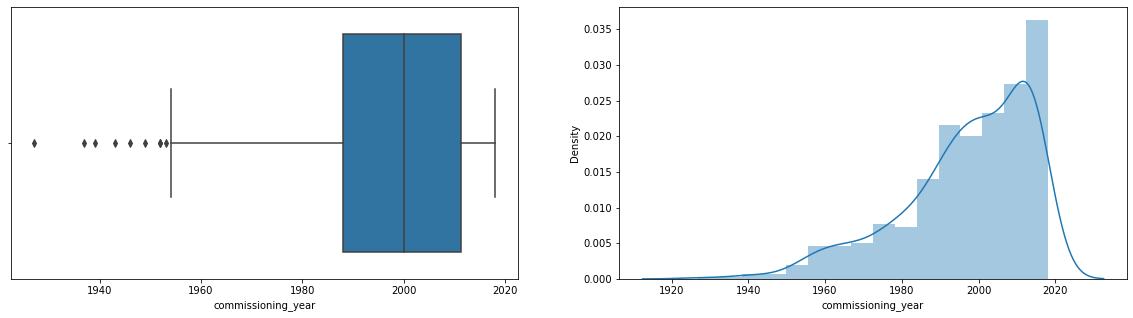

In [281]:
# commissioning_year
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["commissioning_year"])
plt.subplot(1,2,2)
sns.distplot(df["commissioning_year"])

#### Observation:
- commissioning_year value ranges from 1927 to 2018.
- The distribution is left skewed.
- There are few extreme outliers present.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

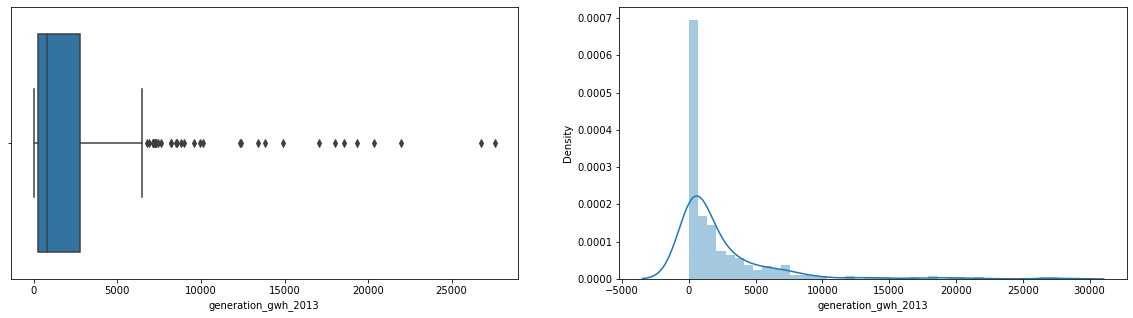

In [282]:
# generation_gwh_2013
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["generation_gwh_2013"])
plt.subplot(1,2,2)
sns.distplot(df["generation_gwh_2013"])

#### Observation:
- generation_gwh_2013 attrbute value ranges from 0 to 27000.
- The distrbution is right skewed. Majority of the values is in the range 0 to 2500.
- There are many extreme outliers present.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

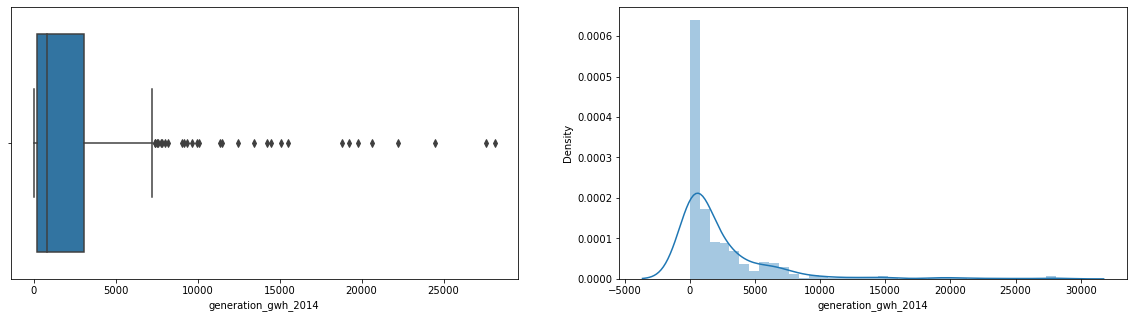

In [283]:
# generation_gwh_2014
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["generation_gwh_2014"])
plt.subplot(1,2,2)
sns.distplot(df["generation_gwh_2014"])

#### Observation:
- generation_gwh_2014 attrbute value ranges from 0 to 28000.
- The distrbution is right skewed. Majority of the values is in the range 0 to 3500.
- There are many extreme outliers present.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

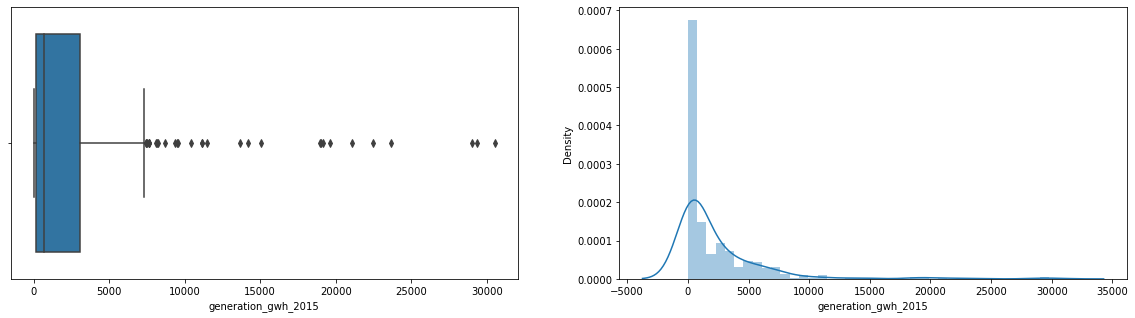

In [284]:
# generation_gwh_2015
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["generation_gwh_2015"])
plt.subplot(1,2,2)
sns.distplot(df["generation_gwh_2015"])

#### Observation:
- generation_gwh_2015 attrbute value ranges from 0 to 30000.
- The distrbution is right skewed. Majority of the values is in the range 0 to 3500.
- There are many extreme outliers present.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

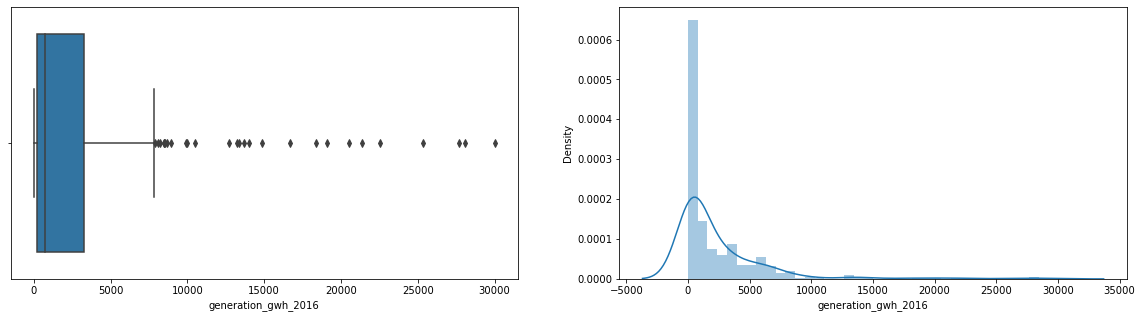

In [285]:
# generation_gwh_2016
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["generation_gwh_2016"])
plt.subplot(1,2,2)
sns.distplot(df["generation_gwh_2016"])

#### Observation:
- generation_gwh_2016 attrbute value ranges from 0 to 30000.
- The distrbution is right skewed. Majority of the values is in the range 0 to 3500.
- There are many extreme outliers present.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

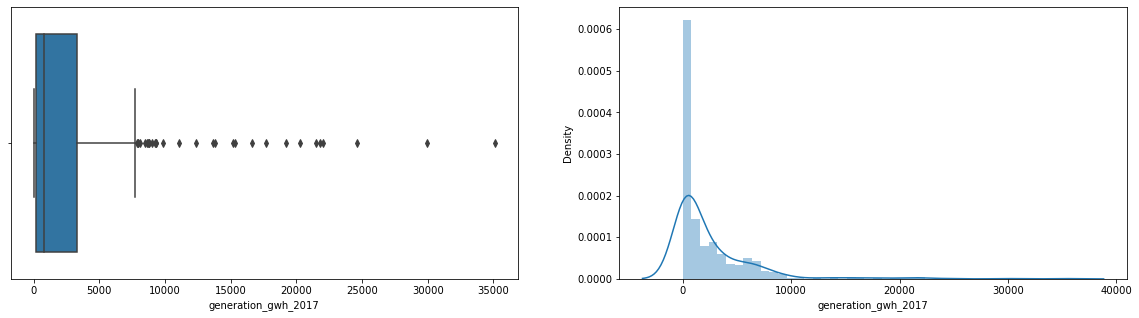

In [286]:
# generation_gwh_2017
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["generation_gwh_2017"])
plt.subplot(1,2,2)
sns.distplot(df["generation_gwh_2017"])

#### Observation:
- generation_gwh_2017 attrbute value ranges from 0 to 35000.
- The distrbution is right skewed. Majority of the values is in the range 0 to 4000.
- There are many extreme outliers present.

#### Categorical columns' analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

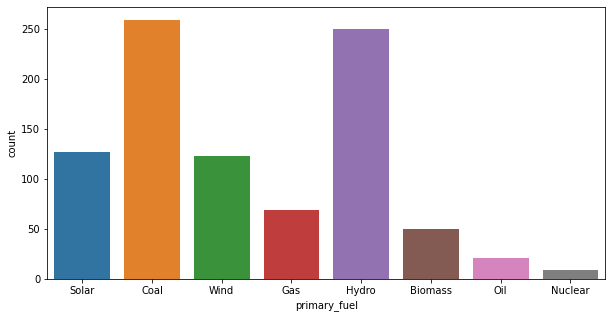

In [287]:
# primary_fuel
plt.figure(figsize=(10,5))
sns.countplot(df['primary_fuel'])

#### Observation:
- Energy sources Coal and Hydro are highly used for electricity generation.
- Least used is Nuclear and Oil.

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

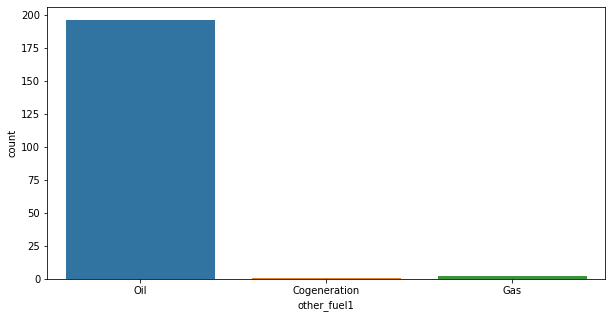

In [288]:
# other_fuel1
plt.figure(figsize=(10,5))
sns.countplot(df['other_fuel1'])

#### Observation:
- In our dataset, we have majority of Oil used as other_fuel1.
- Gas and Cogeneration are used to a small extent.
- Hee we observe biasedness.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

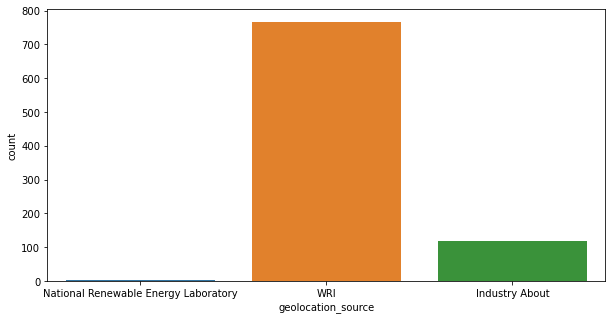

In [289]:
# geolocation_source
plt.figure(figsize=(10,5))
sns.countplot(df['geolocation_source'])

#### Observation:
- Majority of the power plants are from WRI geolocation.
- Around 100 power plants are from Industrial location.
- Very few are from National Renewable Energy Laboratory.

### B] Bivariate Analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

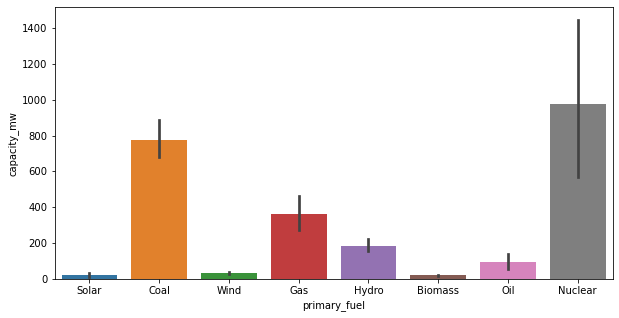

In [290]:
plt.figure(figsize=(10,5))
sns.barplot(x="primary_fuel",y="capacity_mw",data=df)

#### Observation:
- Though the number of Nuclear Plants is least, however, Nuclear plants have the highest capacity for electricity generation.
- After Nuclear Plants, Coal and Gas plants have the high capacity to generate electricity.
- Least capacity plants are Solar and Biomass.

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

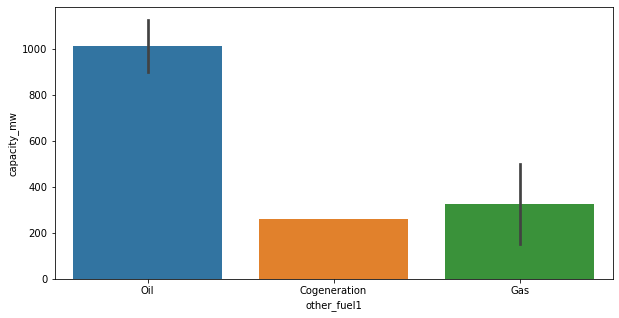

In [291]:
plt.figure(figsize=(10,5))
sns.barplot(x="other_fuel1",y="capacity_mw",data=df)

#### Observation:
- As we have seen plants are using Oil extensively as other fuel, hence the electricity generation capacity is high for Oil.
- However, Gas and Cogeneration usage is less still their capacity is comparatively better.

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

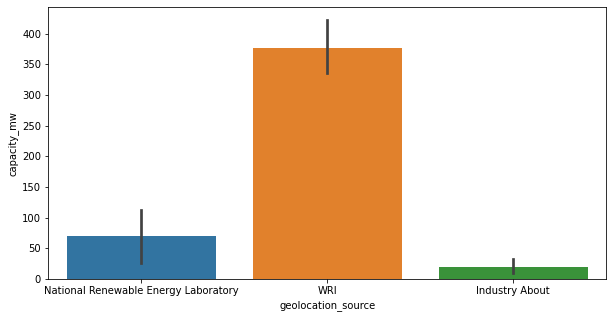

In [292]:
plt.figure(figsize=(10,5))
sns.barplot(x="geolocation_source",y="capacity_mw",data=df)

#### Observation:
- WRI has the highest electrical generating capacity and it makes sense, as we have more plants in WRI location.
- Although we have only 4 National Renewable Energy Laboratory, still the electrical generating capacity is high as compared to Inductry About.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

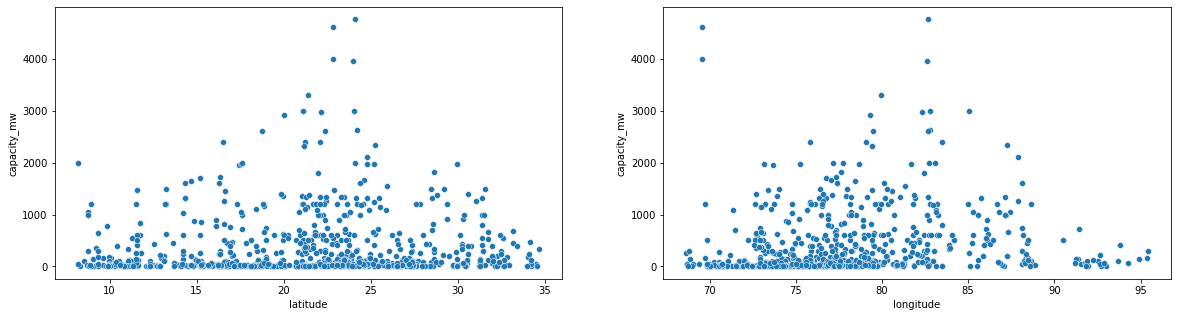

In [293]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.scatterplot(x="latitude",y="capacity_mw",data=df)
plt.subplot(1,2,2)
sns.scatterplot(x="longitude",y="capacity_mw",data=df)

#### Observation:
- Here we dont observe any relationship between latitude and longititude of the power plant location and electricity generation capacity.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

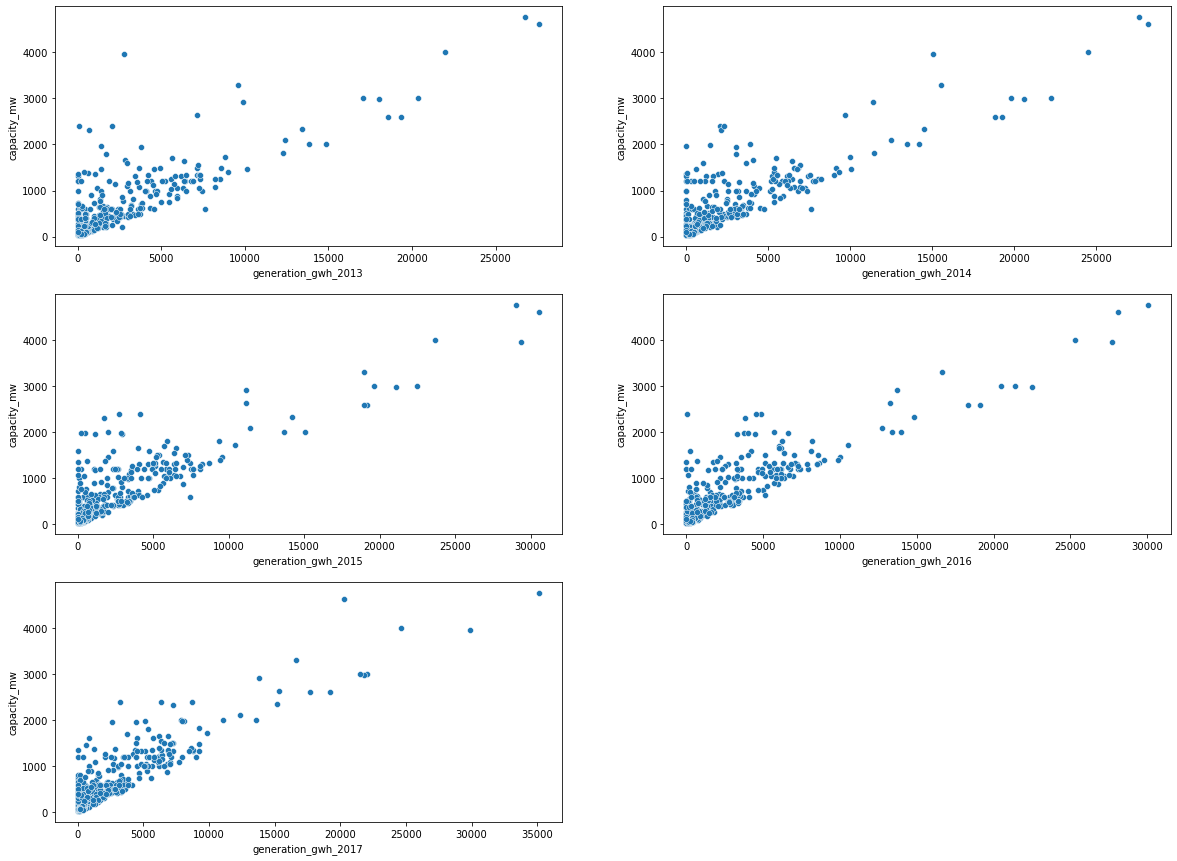

In [294]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.scatterplot(x="generation_gwh_2013",y="capacity_mw",data=df)
plt.subplot(3,2,2)
sns.scatterplot(x="generation_gwh_2014",y="capacity_mw",data=df)
plt.subplot(3,2,3)
sns.scatterplot(x="generation_gwh_2015",y="capacity_mw",data=df)
plt.subplot(3,2,4)
sns.scatterplot(x="generation_gwh_2016",y="capacity_mw",data=df)
plt.subplot(3,2,5)
sns.scatterplot(x="generation_gwh_2017",y="capacity_mw",data=df)

#### Observations:
- More the electricity generation capacity more is energy generated each hour. 
- We observe the same trend for the years from 2013 to 2017.
- We see a high density from 0 to 10000 for all the years.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

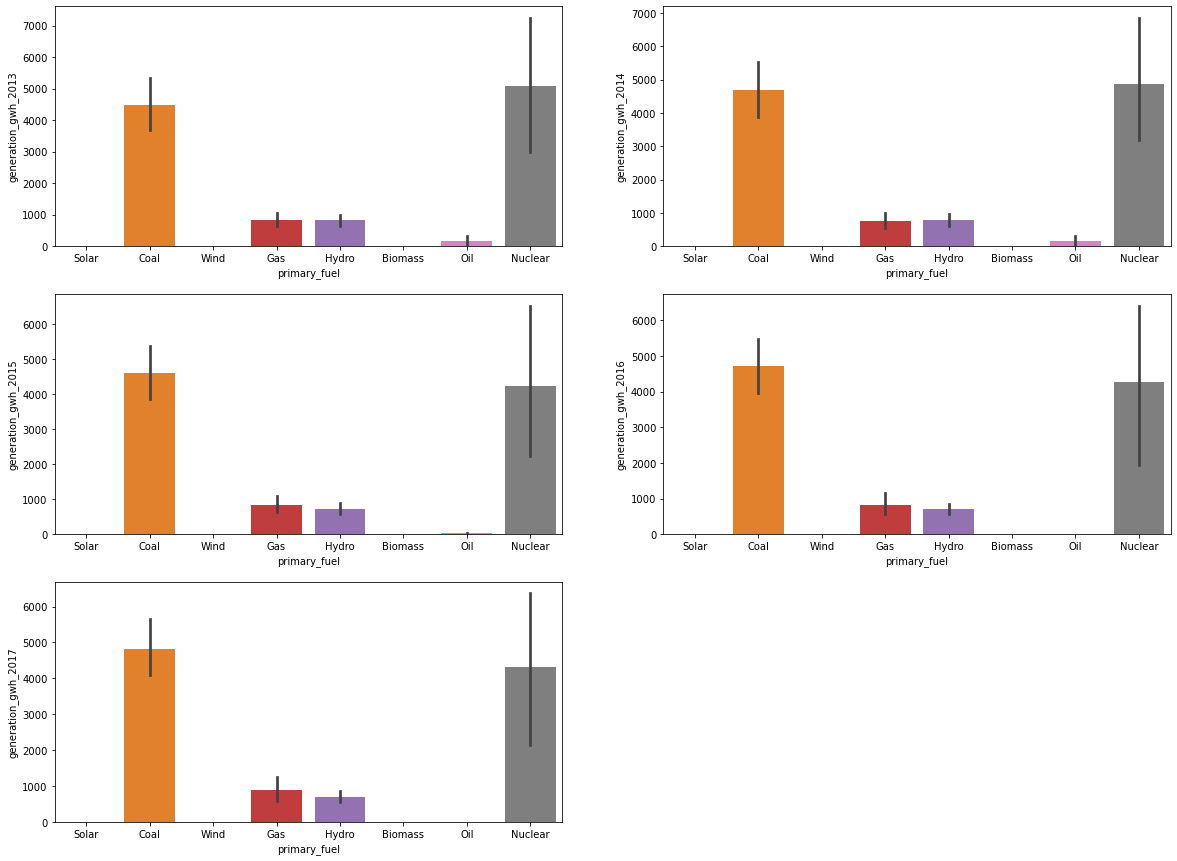

In [295]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.barplot(x="primary_fuel",y="generation_gwh_2013",data=df)
plt.subplot(3,2,2)
sns.barplot(x="primary_fuel",y="generation_gwh_2014",data=df)
plt.subplot(3,2,3)
sns.barplot(x="primary_fuel",y="generation_gwh_2015",data=df)
plt.subplot(3,2,4)
sns.barplot(x="primary_fuel",y="generation_gwh_2016",data=df)
plt.subplot(3,2,5)
sns.barplot(x="primary_fuel",y="generation_gwh_2017",data=df)

#### Observations:
- We see that electricity generation in gigawatt-hours is maximum from Coal and Nuclear resources. This trend is same for all the years.
- Gas and Hydro are also contributing to some extent.
- We see contribution of Oil for initial 2 years, 2013 and 2014.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

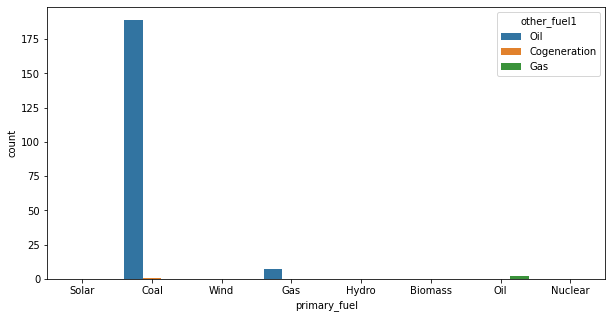

In [297]:
plt.figure(figsize=(10,5))
sns.countplot(x="primary_fuel",hue="other_fuel1",data=df)

#### Observation:
- Here we observe that along with Coal mostly the other fuel used is Oil.
- Oil is also used with Gas.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

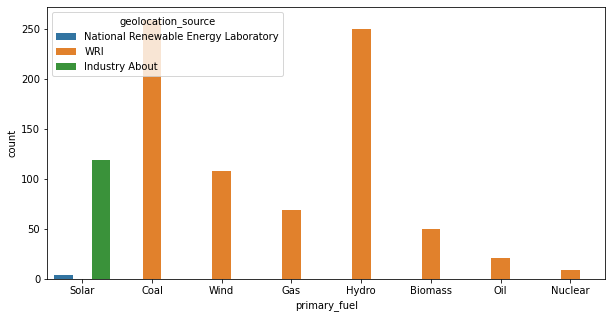

In [298]:
plt.figure(figsize=(10,5))
sns.countplot(x="primary_fuel",hue="geolocation_source",data=df)

#### Observation:
- In WRI geolocation source almost all the primary fuels are used for electricity generation accept Solar fuel.
- Solar fuel is used in Industry About and National Renewable Energy Laboratoty.

## Data Cleaning

### Removing Unwanted Columns

#### After analyzing the columns and considering the model we’re trying to build, we can conclude that the following features can be removed:
  - country : 3 character country code. For all the rows its value is same as IND.
  - country_long : longer form of the country designation. Its same for all rows.
  - name : name or title of the power plant. Its unique for each entry
  - gppd_idnr: 10 or 12 character identifier for the power plant. Its unique for each power plant.
  - other_fuel2 : We have 907 missing values and only 1 value that is Oil.
  - url : web document corresponding to the source field. This will not help in model building.
  - year_of_capacity_data : year the capacity information was reported. It has only one value and we not help in prediction.
  - generation_data_source : attribution for the reported generation information. We have only one value for this. 

In [299]:
# dropping all the above mentioned columns
df=df.drop(["country","country_long","name","gppd_idnr","other_fuel2","url","year_of_capacity_data","generation_data_source"],axis=1)

In [300]:
# printing first 5 rows after deleting the columns
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


### Treating Missing Values

In [302]:
# latitude - Filling null values with the Mean
df["latitude"]=df["latitude"].fillna(df["latitude"].mean())

In [303]:
# latitude - Filling null values with the Median
df["longitude"]=df["latitude"].fillna(df["latitude"].median())

In [304]:
# other_fuel1 - Filling null values with the Mode on the basis of Primary_Fuel
df.loc[(df.other_fuel1.isnull())&(df.primary_fuel=="Gas"),"other_fuel1"]="Oil"
df.loc[(df.other_fuel1.isnull())&(df.primary_fuel=="Oil"),"other_fuel1"]="Gas"
df.loc[(df.other_fuel1.isnull())&(df.primary_fuel=="Coal"),"other_fuel1"]="Oil"
df.loc[(df.other_fuel1.isnull()),"other_fuel1"]="Oil"

In [305]:
# commissioning_year - Filling null values with the Mode 
df["commissioning_year"]=df["commissioning_year"].fillna(df["commissioning_year"].mode()[0])

In [306]:
# owner - Dropping the column as 50% of the data is missing 
df=df.drop("owner",axis=1)

In [307]:
# geolocation_source - Filling null values on the basis of below condition 
df.loc[(df.geolocation_source.isnull())&(df.source=="National Renewable Energy Laboratory"),"geolocation_source"]="National Renewable Energy Laboratory"
df.loc[(df.geolocation_source.isnull())&(df.primary_fuel=="Wind")&(df.other_fuel1=="Oil"),"geolocation_source"]="WRI"

In [308]:
# generation_gwh_2013 - Filling  null values with the median
df["generation_gwh_2013"]=df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].median())

In [309]:
# generation_gwh_2014 - Filling  null values with the median
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())

In [310]:
# generation_gwh_2015 - Filling  null values with the median
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())

In [311]:
# generation_gwh_2016 - Filling  null values with the median
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())

In [312]:
# generation_gwh_2017 - Filling  null values with the median
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())

#### Now, all the missing values are filled. Let's check once!

In [313]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

- Great! All the missing values are filled!

### Creating New Attributes

In [314]:
# Years
df["Years"]=2021-df['commissioning_year']
df.drop("commissioning_year",axis=1,inplace=True) # dropping original column

In [315]:
# printing first 5 rows after added new column
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Years
0,2.5,28.1839,28.1839,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,10.0
1,98.0,24.7663,24.7663,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,8.0
2,39.2,21.9038,21.9038,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,8.0
3,135.0,23.8712,23.8712,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,17.0
4,1800.0,21.9603,21.9603,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,6.0


<AxesSubplot:xlabel='Years', ylabel='Density'>

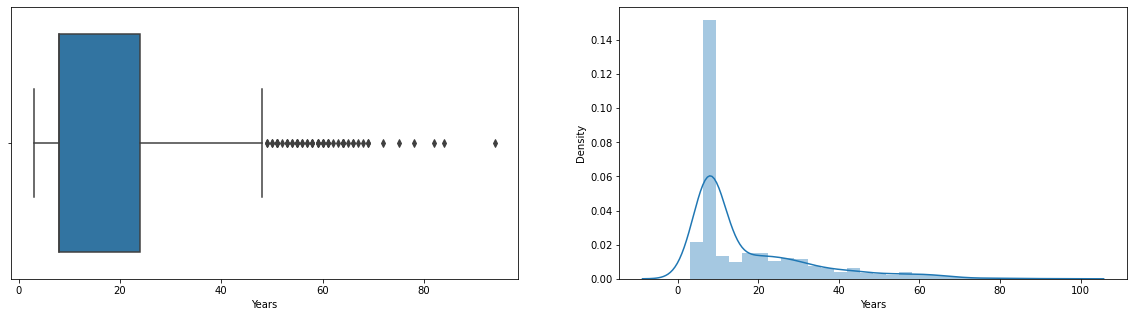

In [316]:
# commissioning_year
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Years"])
plt.subplot(1,2,2)
sns.distplot(df["Years"])

#### Observation:
- The values ranges from 3 to 94. There is a peak at 8.
- The distribution is right skewed. 
- There are few extreme outliers present.

### Removing Outliers

In [317]:
#removing outliers for "longitude",'Years','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017' columns
from scipy.stats import zscore
z=np.abs(zscore(df[["longitude",'Years','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]))
df_new=df[(z<3).all(axis=1)]

#### Plotting boxplots after removing outliers

<AxesSubplot:xlabel='generation_gwh_2017'>

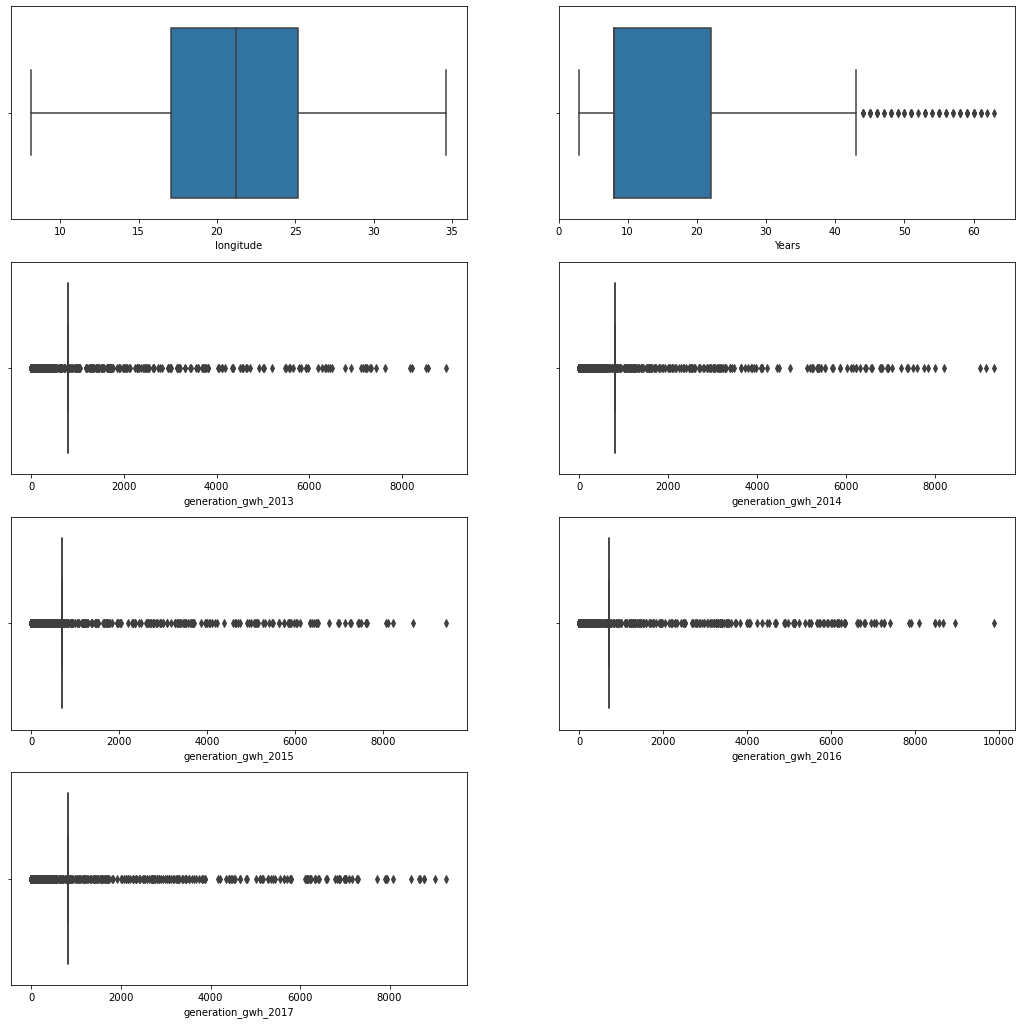

In [318]:
plt.figure(figsize=(18,18))

plt.subplot(4,2,1)
sns.boxplot(df_new["longitude"])
plt.subplot(4,2,2)
sns.boxplot(df_new["Years"])
plt.subplot(4,2,3)
sns.boxplot(df_new["generation_gwh_2013"])
plt.subplot(4,2,4)
sns.boxplot(df_new["generation_gwh_2014"])
plt.subplot(4,2,5)
sns.boxplot(df_new["generation_gwh_2015"])
plt.subplot(4,2,6)
sns.boxplot(df_new["generation_gwh_2016"])
plt.subplot(4,2,7)
sns.boxplot(df_new["generation_gwh_2017"])

- Even after removing outliers, there are some present.

In [319]:
# checking number of rows and columns after removing outliers
df_new.shape

(871, 13)

- After removing outliers we have 871 rows and 13 columns.

### Percentage of data loss:

In [320]:
# checking percentage of data loss
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

4.07 %


- There is 4.07% of data loss with the outlier removal. To some extent outliers are removed

### One hot Encoding

In [321]:
# Encoding for first target variable "primary_fuel"
df1=pd.get_dummies(df_new,columns=['other_fuel1','geolocation_source'])

# Encoding for second target variable "capacity_mw"
df2=pd.get_dummies(df_new,columns=['other_fuel1','geolocation_source','primary_fuel'])

### Label Encoding

In [322]:
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder() 
cols=["primary_fuel","source"]
for col in cols:
    df1[col]=LE.fit_transform(df1[col]) # for "primary_fuel" target variable
    
df2['source']=LE.fit_transform(df2['source']) # for "capacity_mw" target variable

In [323]:
# printing first 5 rows for dataset where target variable is primary_fuel
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Years,other_fuel1_Cogeneration,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,28.1839,6,109,797.063475,805.760000,701.02725,716.728350,807.601700,10.0,0,0,1,0,1,0
1,98.0,24.7663,24.7663,1,174,797.063475,805.760000,701.02725,716.728350,807.601700,8.0,0,0,1,0,0,1
2,39.2,21.9038,21.9038,7,21,797.063475,805.760000,701.02725,716.728350,807.601700,8.0,0,0,1,0,0,1
3,135.0,23.8712,23.8712,2,22,631.777928,617.789264,843.74700,886.004428,663.774500,17.0,0,0,1,0,0,1
4,1800.0,21.9603,21.9603,1,22,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,6.0,0,0,1,0,0,1


In [324]:
# printing first 5 rows for dataset where target variable is primary_fuel
df2.head()

,capacity_mw,latitude,longitude,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Years,...,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,28.1839,28.1839,109,797.063475,805.760000,701.02725,716.728350,807.601700,10.0,...,1,0,0,0,0,0,0,0,1,0
1,98.0,24.7663,24.7663,174,797.063475,805.760000,701.02725,716.728350,807.601700,8.0,...,0,1,0,1,0,0,0,0,0,0
2,39.2,21.9038,21.9038,21,797.063475,805.760000,701.02725,716.728350,807.601700,8.0,...,0,1,0,0,0,0,0,0,0,1
3,135.0,23.8712,23.8712,22,631.777928,617.789264,843.74700,886.004428,663.774500,17.0,...,0,1,0,0,1,0,0,0,0,0
4,1800.0,21.9603,21.9603,22,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,6.0,...,0,1,0,1,0,0,0,0,0,0


### Correlation Matrix

<AxesSubplot:>

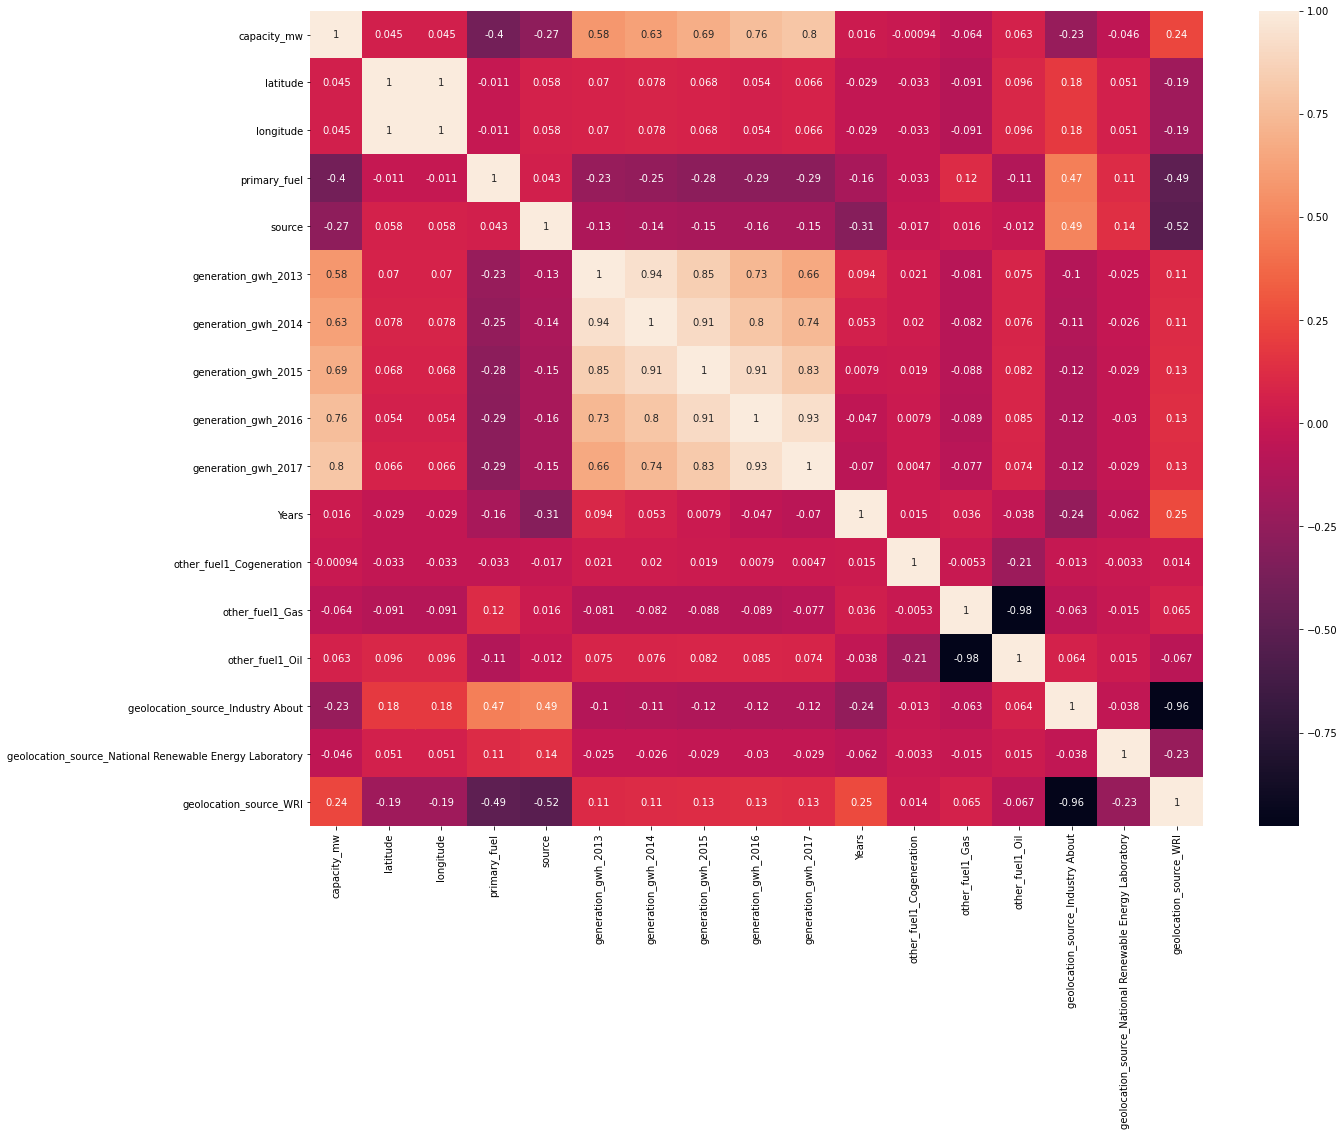

In [325]:
# checking correlation for df1
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True)

#### Observations:
- Target variable "primary_fuel" is highly correlated with geolocation_source_IndutryAbout, geolocation_source_WRI. Also it has good correlation with generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017.
- It is least correlated with Years, latitude and longitude, other_fuel1_Cogeneration. Also latitude and longitude are highly correlated with each other.
- We observe high correlation between independent variables like other_fuel1_Oil and other_fuel1_Gas, geolocation_source_WRI and geolocation_IndutryAbout, generation_gwh_2013 and generation_gwh_2014, generation_gwh_2016 and generation_gwh_2017.

<AxesSubplot:>

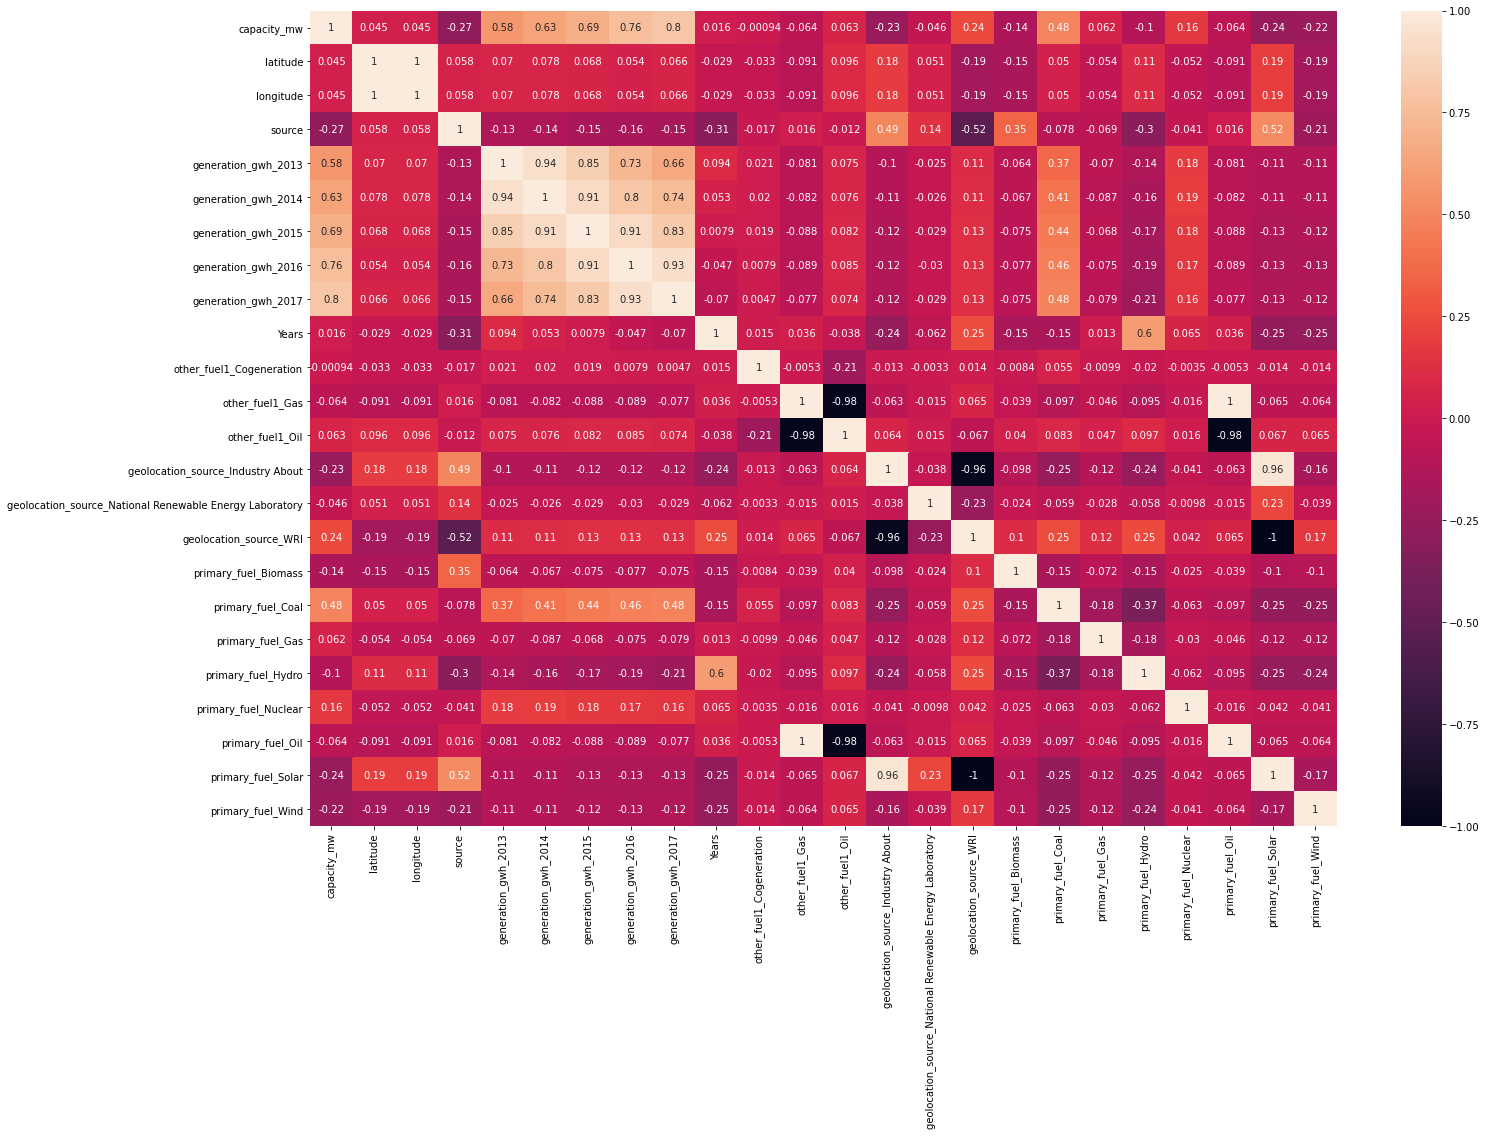

In [326]:
# checking correlation for df2
plt.figure(figsize=(23,15))
sns.heatmap(df2.corr(),annot=True)

#### Observations:
- Target variable "capacity_mw" is highly correlated with generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, primary_fuel_Coal.
- It is least correlated with other_fuel1_Cogeneration, Years, latitude and longitude. Here also latitude and longitude are highly correlated with each other.
- Here too we observe high correlation between independent variables like other_fuel1_Oil and other_fuel1_Gas, geolocation_source_WRI and geolocation_IndutryAbout, generation_gwh_2013 and generation_gwh_2014, generation_gwh_2016 and generation_gwh_2017, primary_fuel_Solar and geolocation_source WRI, primary_fuel_Oil and other_fuel1_Oil.

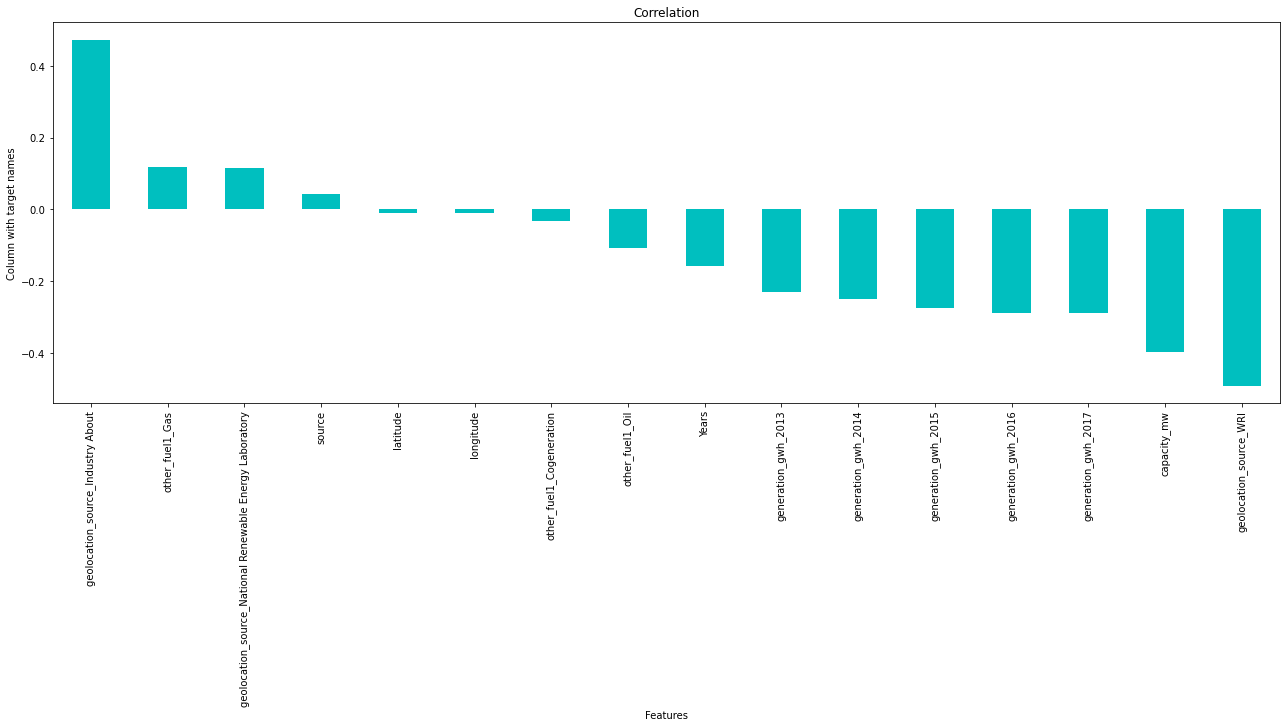

In [327]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df1.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

#### Observation:
- Here we see that "primary_fuel" is least correlated with latitude and longitude.
- Highly correlated with geolocation_source_Industry About, geolocation_source_WRI and capacity_mw.

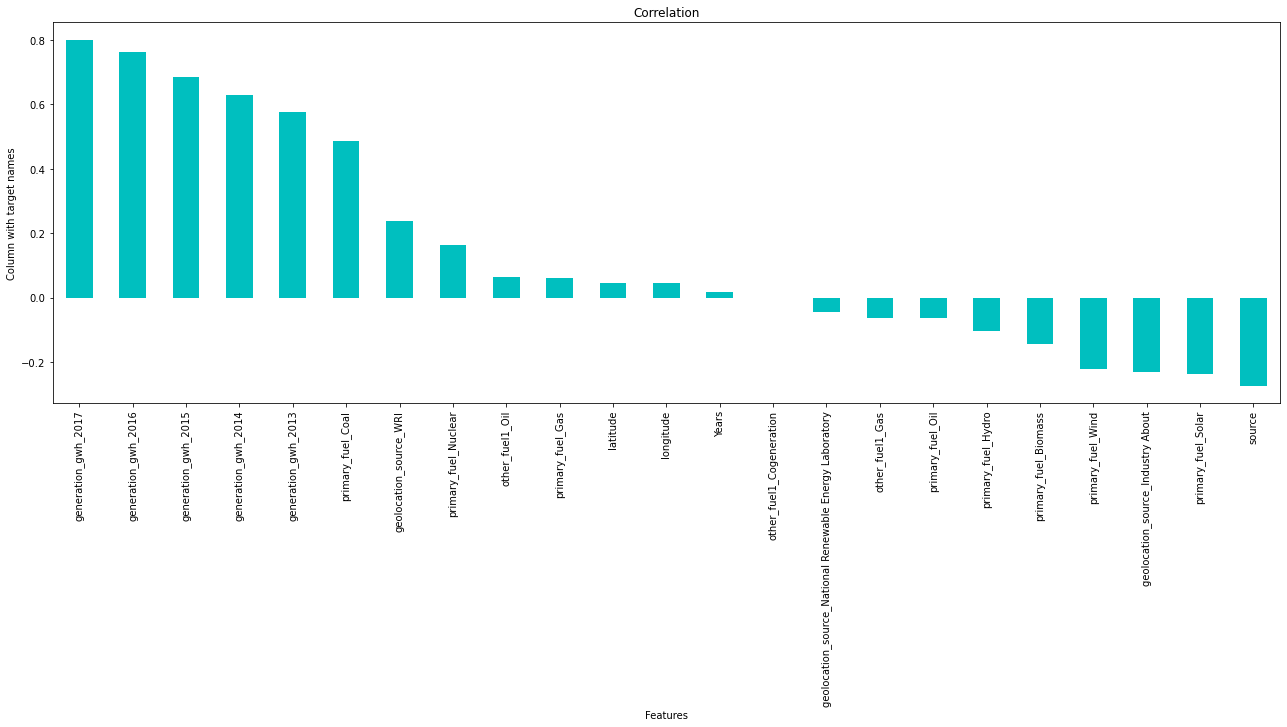

In [328]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df2.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

#### Observation:
- Here we see that "capacity_mw" is least correlated with other_fuel1_Cogeneration and Years.
- It is highly correlated with generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013.

## A] primary_fuel

### Creating X an Y Split

In [329]:
# Splitting data into X and Y
df1_x=df1.drop(columns=["primary_fuel"],axis=1)
df1_y=df1["primary_fuel"]

### Treating Imbalanced Data

In [330]:
# Doing over sampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
df1_x,df1_y=SM.fit_resample(df1_x,df1_y)

In [331]:
# checking value counts for target variable after balancing data
df1_y.value_counts()

7    240
6    240
5    240
4    240
3    240
2    240
1    240
0    240
Name: primary_fuel, dtype: int64

- Now, our dataset variable is balanced for the target variable "primary_fuel.

### Checking and Removing Skewness

In [332]:
# skewness before removing outliers
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude             -0.147391
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
Years                  1.779021
dtype: float64

- This is the skewness before removing outliers.

In [333]:
# skewness after removing outliers
df1_x.skew()

capacity_mw                                                 2.109194
latitude                                                    0.047841
longitude                                                   0.047841
source                                                      1.430505
generation_gwh_2013                                         3.027791
generation_gwh_2014                                         2.631035
generation_gwh_2015                                         2.744231
generation_gwh_2016                                         2.423523
generation_gwh_2017                                         2.292953
Years                                                       1.543443
other_fuel1_Cogeneration                                   43.817805
other_fuel1_Gas                                             2.269560
other_fuel1_Oil                                            -2.262375
geolocation_source_Industry About                           2.413910
geolocation_source_National Renewa

- We can ignore the skewness of categorical columns. After removing outliers, Skewness is also reduced for numerical columns but not completely. Here we have skewness for the below columns:
 - capacity_mw
 - generation_gwh_2013
 - generation_gwh_2014
 - generation_gwh_2015
 - generation_gwh_2016
 - generation_gwh_2017
 - Years

In [334]:
from sklearn.preprocessing import PowerTransformer

In [335]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(df1_x)
df1_x=pd.DataFrame(data_PT,columns=df1_x.columns)

- Let's check the skewness now.

In [336]:
df1_x.skew()

capacity_mw                                                 0.022049
latitude                                                   -0.042534
longitude                                                  -0.042534
source                                                     -0.134425
generation_gwh_2013                                         0.203231
generation_gwh_2014                                         0.115963
generation_gwh_2015                                         0.086195
generation_gwh_2016                                         0.007704
generation_gwh_2017                                         0.035913
Years                                                       0.188681
other_fuel1_Cogeneration                                   43.817805
other_fuel1_Gas                                             2.269560
other_fuel1_Oil                                            -2.262375
geolocation_source_Industry About                           2.413910
geolocation_source_National Renewa

- Now, the all the skew values are between -0.5 to +0.5.

### Scaling

- As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.
- As we have only 12 features in our dataset, we will not perform PCA.

## Building the Model

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [338]:
from sklearn.ensemble import RandomForestClassifier
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(df1_x,df1_y,test_size=.30,random_state=i)
    mod=RandomForestClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.9444444444444444  on Random State  64


- Using the best Random State to create new train_test_split.

In [339]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(df1_x,df1_y,test_size=.30,random_state=maxRS)

In [340]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#### 1.AdaBoostClassifier

In [341]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[ 0  0  0  0  0  0  0 78]
 [ 0  0  0  0  0  0  0 70]
 [ 0  0  0  0  0  0  0 73]
 [ 0  0  0  0  0  0  0 73]
 [ 0  0  0  0  0  0  0 73]
 [ 0  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 62]] 

Accuracy Score: 36.28472222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00        73
           5       1.00      1.00      1.00        73
           6       1.00      1.00      1.00        74
           7       0.14      1.00      0.25        62

    accuracy                           0.36       576
   macro avg       0.27      0.38      0.28       576
weighted avg       0.27      0.36      0.28       576



#### 2.RandomForestClassifier

In [342]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[77  1  0  0  0  0  0  0]
 [ 1 55  4  3  6  0  0  1]
 [ 1  4 67  1  0  0  0  0]
 [ 0  4  7 61  1  0  0  0]
 [ 0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 62]] 

Accuracy Score: 94.09722222222221
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           1       0.86      0.79      0.82        70
           2       0.86      0.92      0.89        73
           3       0.94      0.84      0.88        73
           4       0.91      1.00      0.95        73
           5       1.00      1.00      1.00        73
           6       1.00      1.00      1.00        74
           7       0.98      1.00      0.99        62

    accuracy                           0.94       576
   macro avg       0.94      0.94      0.94       576
weighted avg       0.94      0.94      0.94       576



#### 3.SVC

In [343]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[74  1  0  0  0  0  0  3]
 [ 4 43  7  2 11  0  0  3]
 [11  5 54  1  2  0  0  0]
 [ 0  7 11 54  1  0  0  0]
 [ 0  0  3  2 68  0  0  0]
 [ 0  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 62]] 

Accuracy Score: 87.15277777777779
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        78
           1       0.77      0.61      0.68        70
           2       0.72      0.74      0.73        73
           3       0.92      0.74      0.82        73
           4       0.83      0.93      0.88        73
           5       1.00      1.00      1.00        73
           6       1.00      1.00      1.00        74
           7       0.91      1.00      0.95        62

    accuracy                           0.87       576
   macro avg       0.87      0.87      0.87       576
weighted avg       0.87      0.87      0.87       576



#### 4.DecisionTreeClassifier

In [344]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[75  1  2  0  0  0  0  0]
 [ 0 50 11  6  2  0  0  1]
 [ 0  8 64  1  0  0  0  0]
 [ 0  7 11 54  1  0  0  0]
 [ 0  5  1  0 67  0  0  0]
 [ 0  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 62]] 

Accuracy Score: 90.10416666666666
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.70      0.71      0.71        70
           2       0.72      0.88      0.79        73
           3       0.89      0.74      0.81        73
           4       0.96      0.92      0.94        73
           5       1.00      1.00      1.00        73
           6       1.00      1.00      1.00        74
           7       0.98      1.00      0.99        62

    accuracy                           0.90       576
   macro avg       0.91      0.90      0.90       576
weighted avg       0.91      0.90      0.90       576



#### Observation:
- Here, we observe that RandomForestClassifier is giving the highest accuracy score of 94%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [346]:
# importing cross validation module
from sklearn.model_selection import cross_val_score

In [347]:
print(cross_val_score(AD,df1_x,df1_y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.375


In [348]:
print(cross_val_score(RFC,df1_x,df1_y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.9229166666666666


In [349]:
print(cross_val_score(SC,df1_x,df1_y,cv=5).mean()) #cross validation score for SVC

0.8541666666666666


In [350]:
print(cross_val_score(DTC,df1_x,df1_y,cv=5).mean()) #cross validation score for SVC

0.8848958333333332


#### Observation:
- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

### Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [352]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [353]:
parameters={'n_estimators':[40,50,60,80,100,110],
          'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8,9,10,11],
          'min_samples_split':[10,12,15,17,20,21]}

In [354]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [10, 12, 15, 17, 20, 21],
                         'n_estimators': [40, 50, 60, 80, 100, 110]})

In [740]:
GCVRFC.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_split': 12,
 'n_estimators': 60}

In [355]:
Final_modRFC=RandomForestClassifier(criterion='gini',max_depth=11,min_samples_split=12,n_estimators=60)
Final_modRFC.fit(x_train,y_train)
pred=Final_modRFC.predict(x_test)
pred_proba=Final_modRFC.predict_proba(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[75  2  0  0  0  0  0  1]
 [ 0 53  7  2  7  0  0  1]
 [ 3  6 63  1  0  0  0  0]
 [ 0  1 10 60  2  0  0  0]
 [ 0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 62]] 

Accuracy Score: 92.53472222222221
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        78
           1       0.85      0.76      0.80        70
           2       0.79      0.86      0.82        73
           3       0.95      0.82      0.88        73
           4       0.89      1.00      0.94        73
           5       1.00      1.00      1.00        73
           6       1.00      1.00      1.00        74
           7       0.97      1.00      0.98        62

    accuracy                           0.93       576
   macro avg       0.93      0.93      0.92       576
weighted avg       0.93      0.93      0.92       576



- After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 89%

### Plotting AUC_ROC curve

In [356]:
from sklearn.metrics import roc_curve, roc_auc_score

In [358]:
# roc auc score
roc_auc_score(y_test,pred_proba,multi_class='ovo',average='weighted')

0.9920502772448968

- The ROC_AUC score is 0.99.

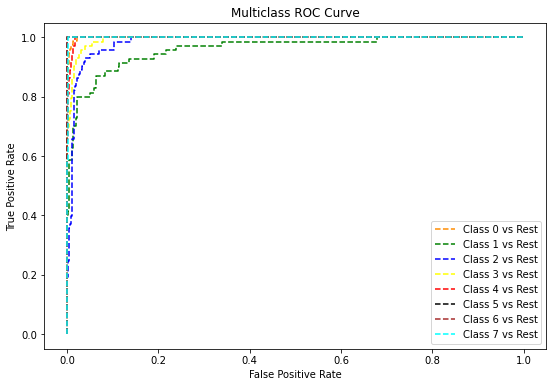

In [365]:
# roc curve for classes
plt.figure(figsize=(9,6))
fpr={}
tpr={}
thresh={}

n_class=8

for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_test,pred_proba[:,i],pos_label=i)
    
# plotting
plt.plot(fpr[0],tpr[0],linestyle='--',color='darkorange',label='Class 0 vs Rest')
plt.plot(fpr[1],tpr[1],linestyle='--',color='green',label='Class 1 vs Rest')
plt.plot(fpr[2],tpr[2],linestyle='--',color='blue',label='Class 2 vs Rest')
plt.plot(fpr[3],tpr[3],linestyle='--',color='yellow',label='Class 3 vs Rest')
plt.plot(fpr[4],tpr[4],linestyle='--',color='red',label='Class 4 vs Rest')
plt.plot(fpr[5],tpr[5],linestyle='--',color='black',label='Class 5 vs Rest')
plt.plot(fpr[6],tpr[6],linestyle='--',color='brown',label='Class 6 vs Rest')
plt.plot(fpr[7],tpr[7],linestyle='--',color='aqua',label='Class 7 vs Rest')

plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.savefig("Multiclass",dpi=300);

- This is AUC_ROC curve plotted by using the One vs All technique(calculating auc-roc curve considering each label at a time and all the other can be grouped as one  label).

## B] capacity_mw

In [389]:
# Splitting data into X and Y and dropping the columns which are least correlated with the target variable
df2_x=df2.drop(columns=["capacity_mw","primary_fuel_Oil","other_fuel1_Cogeneration"],axis=1)
df2_y=df2["capacity_mw"]

### Checking and Removing Skewness

In [390]:
# skewness before removing outliers
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude             -0.147391
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
Years                  1.779021
dtype: float64

- This is the skewness before removing outliers.

In [391]:
# skewness after removing outliers
df2_x.skew()

latitude                                                   -0.141130
longitude                                                  -0.141130
source                                                      1.762555
generation_gwh_2013                                         3.131242
generation_gwh_2014                                         2.974343
generation_gwh_2015                                         2.749239
generation_gwh_2016                                         2.669984
generation_gwh_2017                                         2.564321
Years                                                       1.576230
other_fuel1_Gas                                             6.215618
other_fuel1_Oil                                            -6.061628
geolocation_source_Industry About                           2.119680
geolocation_source_National Renewable Energy Laboratory    10.307768
geolocation_source_WRI                                     -2.010693
primary_fuel_Biomass              

- We can ignore the skewness of categorical columns. After removing outliers, Skewness is also reduced for numerical columns but not completely. Here we have skewness for the below columns:
 - generation_gwh_2013
 - generation_gwh_2014
 - generation_gwh_2015
 - generation_gwh_2016
 - generation_gwh_2017
 - Years

In [393]:
# Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(df2_x)
df2_x=pd.DataFrame(data_PT,columns=df2_x.columns)

- Let's check the skewness now.

In [394]:
df2_x.skew()

latitude                                                   -0.074049
longitude                                                  -0.074049
source                                                     -0.186006
generation_gwh_2013                                         0.280012
generation_gwh_2014                                         0.234600
generation_gwh_2015                                         0.167402
generation_gwh_2016                                         0.150835
generation_gwh_2017                                         0.128724
Years                                                       0.167258
other_fuel1_Gas                                             6.215618
other_fuel1_Oil                                            -6.061628
geolocation_source_Industry About                           2.119680
geolocation_source_National Renewable Energy Laboratory    10.307768
geolocation_source_WRI                                     -2.010693
primary_fuel_Biomass              

- Now, the all the skew values are between -0.5 to +0.5.

### Scaling

- As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.
- As we have only 12 features in our dataset, we will not perform PCA.

## Building the Model

In [395]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [396]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(df2_x,df2_y,test_size=.20,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.6959130958984068  on Random State  138


- Using the best Random State to create new train_test_split.

In [397]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(df2_x,df2_y,test_size=.30,random_state=maxRS)

In [398]:
#Importing the algorithmns to build models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor


#### 1.LinearRegression

Mean absolute error: 177.82897353885923
Mean squared error: 62577.334310856226
Root Mean squared error: 250.15462080652483
R2 Score: 0.6281028839511262


<AxesSubplot:title={'center':'Model Coeficients'}>

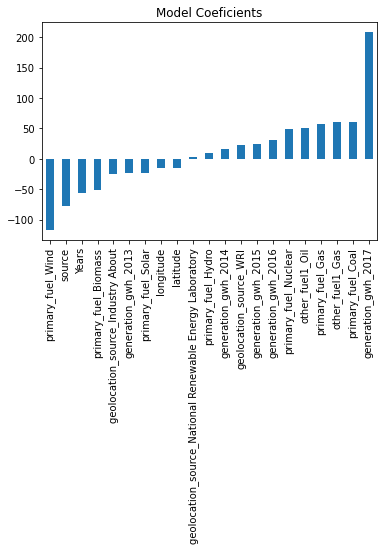

In [399]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

coef=pd.Series(LR.coef_,df2_x.columns).sort_values()
coef.plot(kind="bar",title="Model Coeficients")

#### 2.RandomForestRegressor

Mean absolute error: 97.08132046931154
Mean squared error: 29765.129379617978
Root Mean squared error: 172.52573541248267
R2 Score: 0.8231058274212693


<AxesSubplot:title={'center':'Feature Importance'}>

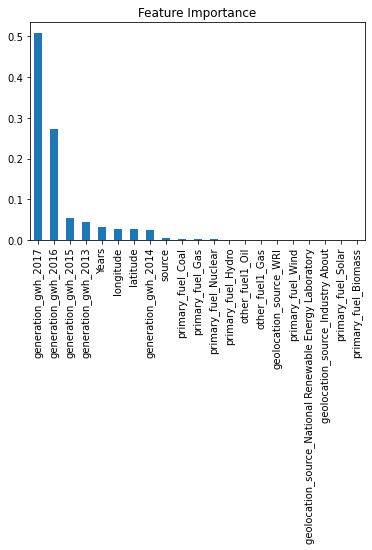

In [400]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,df2_x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 3.ExtraTreesRegressor

Mean absolute error: 93.6937535114504
Mean squared error: 29406.775094083518
Root Mean squared error: 171.48403743230307
R2 Score: 0.8252355270446503


<AxesSubplot:title={'center':'Feature Importance'}>

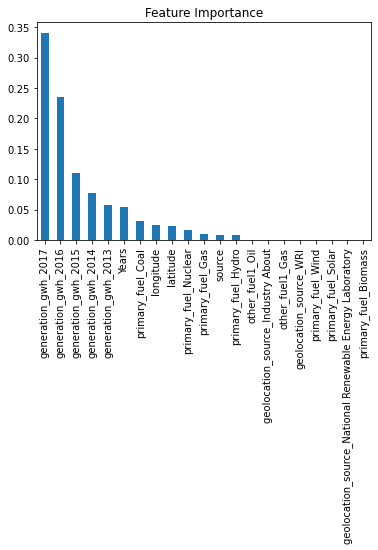

In [402]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(ETR.feature_importances_,df2_x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 4.XGBRegressor

Mean absolute error: 100.52705067378966
Mean squared error: 35124.767351263596
Root Mean squared error: 187.41602746633916
R2 Score: 0.7912534973936023


<AxesSubplot:title={'center':'Feature Importance'}>

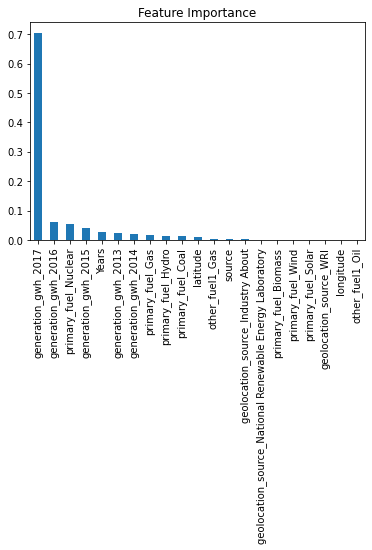

In [403]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(XGB.feature_importances_,df2_x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### 5.DecisionTreeRegressor

Mean absolute error: 116.87180916030535
Mean squared error: 54152.65038674046
Root Mean squared error: 232.70722031501398
R2 Score: 0.6781707829676942


<AxesSubplot:title={'center':'Feature Importance'}>

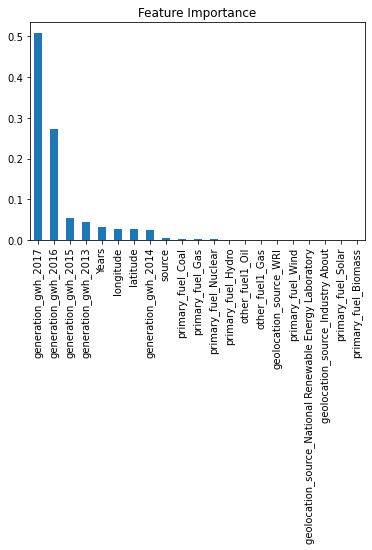

In [404]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

features=pd.Series(RFR.feature_importances_,df2_x.columns).sort_values(ascending=False)
features.plot(kind="bar",title="Feature Importance")

#### Observation:
- Here, we observe that RandomForestClassifier is giving the highest r2 score of 82%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [405]:
from sklearn.model_selection import cross_val_score

In [406]:
print(cross_val_score(LR,df2_x,df2_y,cv=5).mean()) #cross validation for LinearRegression

0.5505712844828473


In [407]:
print(cross_val_score(RFR,df2_x,df2_y,cv=5).mean()) #cross validation for RandomForestRegressor

0.766151715666451


In [409]:
print(cross_val_score(ETR,df2_x,df2_y,cv=5).mean()) #cross validation for ExtraTreesRegressor

0.7740877206059003


In [410]:
print(cross_val_score(XGB,df2_x,df2_y,cv=5).mean()) #cross validation for XGBRegressor

0.6935222121779346


In [411]:
print(cross_val_score(DTR,df2_x,df2_y,cv=5).mean()) #cross validation for XGBRegressor

0.5373919146920132


#### Observation:
- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

### Hyper Parameter Tuning

In [412]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [413]:
parameters={'criterion':['mse','mae'],
          'max_depth':[3,4,5,6,7,8,9,10],
          'max_features':['auto','log2','sqrt'],
           'n_estimators':[40,50,60,80,100,110]}

In [414]:
GCVRFR=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCVRFR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [40, 50, 60, 80, 100, 110]})

In [415]:
GCVRFR.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 110}

In [416]:
Final_modRFR=RandomForestRegressor(criterion='mae',max_depth=10,n_estimators=110,max_features='sqrt')
Final_modRFR.fit(x_train,y_train)
pred=Final_modRFR.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

85.3596282116408


- After Hyper Parameter tuning, the improved score of the best model SVC is 85.36%

## Saving the Models

In [418]:
import joblib
joblib.dump(Final_modRFC,"Primary_Fuel_model.pkl")

['Primary_Fuel_model.pkl']

In [419]:
joblib.dump(Final_modRFR,"Capacity_model.pkl")

['Capacity_model.pkl']